## Testing the noobrainer API

In [1]:
import requests
import json
from wordcloud import WordCloud
from scipy.special import softmax
import matplotlib.pyplot as plt

### 1. Prepare request

In [2]:
request = json.dumps(
    {
        'query_string': "Biden Announces He Has Hidden 5 Golden Crack Pipes In Safe Smoking Kits",
        'num_topics': 10,
        'topics_reduced': 'false'
    }
)

### 2. Send request and get the response

In [3]:
response = requests.post('http://its80601d.twu.ca:8000/tomo/topics/query', data=request)

In [4]:
response.json()[0].keys()

dict_keys(['topic_num', 'topic_words', 'word_scores', 'topic_score'])

In [5]:
for r in response.json():
    print(f"Topic {r['topic_num']} score: {r['topic_score']}")

Topic 1 score: 0.36477047204971313
Topic 75 score: 0.362114280462265
Topic 155 score: 0.3469604551792145
Topic 508 score: 0.3138280510902405
Topic 559 score: 0.30684149265289307
Topic 443 score: 0.304374635219574
Topic 5 score: 0.29661354422569275
Topic 403 score: 0.27506688237190247
Topic 328 score: 0.27237606048583984
Topic 429 score: 0.2669435441493988


### 3. Make wordclouds from the respones

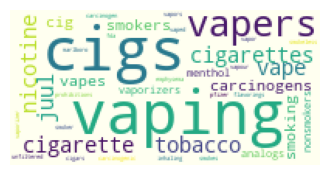

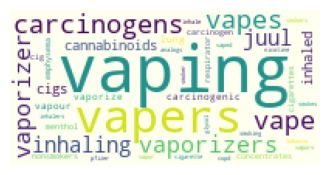

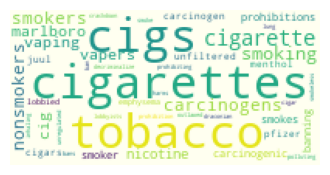

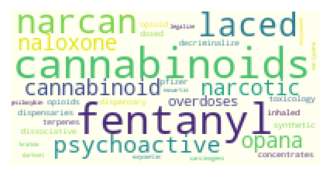

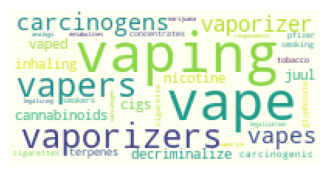

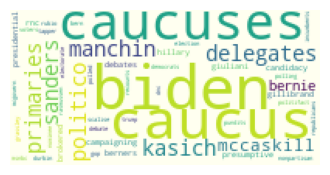

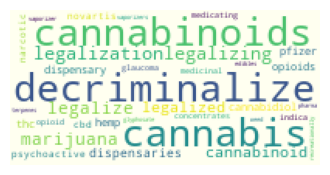

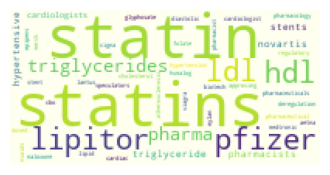

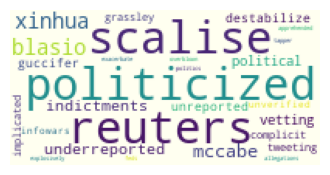

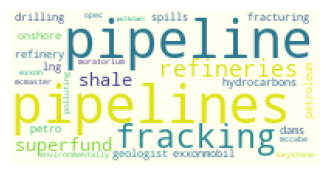

In [6]:
for r in response.json():

    word_score_dict = dict(
        zip(
            r['topic_words'],
            softmax(r['word_scores'])
        )
    )
    img = WordCloud(
        width=200,
        height=100,
        background_color='ivory').generate_from_frequencies(word_score_dict)
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(img)
    plt.show();

### 4. Try another query

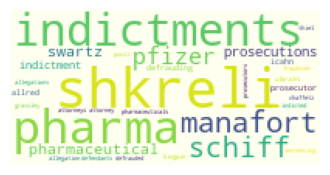

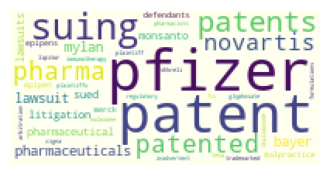

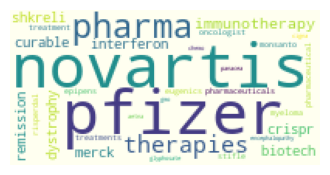

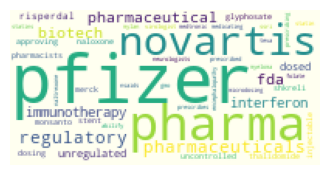

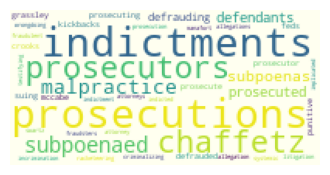

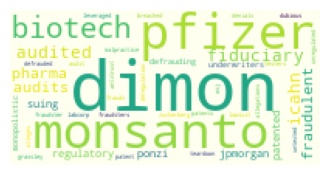

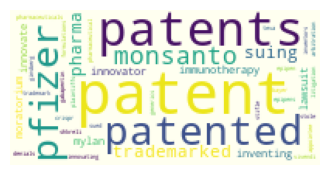

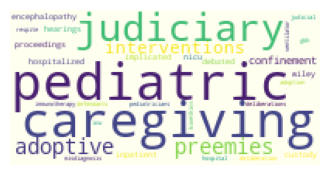

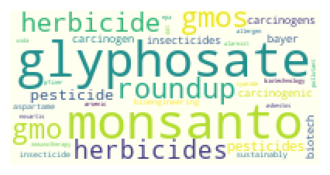

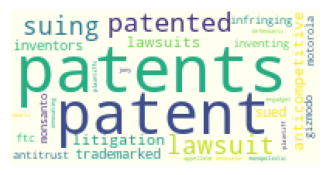

In [7]:
request = json.dumps(
    {
        'query_string': "Judge was found guilty bribing a genetic therapy biotech CEO with favorable legal decision",
        'num_topics': 10,
        'topics_reduced': 'false'
    }
)
response = requests.post('http://its80601d.twu.ca:8000/tomo/topics/query', data=request)
for r in response.json():

    word_score_dict = dict(
        zip(
            r['topic_words'],
            softmax(r['word_scores'])
        )
    )
    img = WordCloud(
        width=200,
        height=100,
        background_color='ivory').generate_from_frequencies(word_score_dict)
    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(img)
    plt.show();